In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
import datetime as dt
import numpy as np
plt.style.use('seaborn-whitegrid')
import pandas as pd
import seaborn as sns
from matplotlib import dates as mpl_dates

data = pd.read_csv("xlr178node115-metrologie.csv", sep=",")
# data = pd.read_csv("xlr178node115-ipmi-metrologie.csv", sep=",")
data.head()


,date,hostname,load1,CPU_1,CPU_2,P1_DIMM_1-4,P1_DIMM_5-8,P2_DIMM_1-4,P2_DIMM_5-8,Sys_Exhaust_1,Sys_Exhaust_2,P/S_1_Inlet,P/S_2_Inlet,P/S_1_Exhaust,P/S_2_Exhaust,PS_1_Output,PS_2_Output,CPU_Utilization
0,1.630309e+09,xlr178node115,0.00,36.0,39.0,16.0,17.0,15.0,15.0,21.0,23.0,8.0,8.0,40.0,40.0,345.0,320.0,0.0
1,1.630309e+09,xlr178node115,0.00,36.0,39.0,16.0,16.0,15.0,15.0,21.0,23.0,8.0,7.0,40.0,40.0,345.0,320.0,0.0
2,1.630309e+09,xlr178node115,0.00,36.0,39.0,16.0,16.0,15.0,15.0,21.0,23.0,8.0,8.0,40.0,40.0,345.0,320.0,0.0
3,1.630309e+09,xlr178node115,0.00,36.0,39.0,17.0,17.0,15.0,15.0,21.0,23.0,8.0,8.0,40.0,40.0,345.0,320.0,0.0
4,1.630309e+09,xlr178node115,0.67,37.0,41.0,16.0,17.0,15.0,15.0,21.0,23.0,8.0,8.0,40.0,40.0,345.0,320.0,0.0


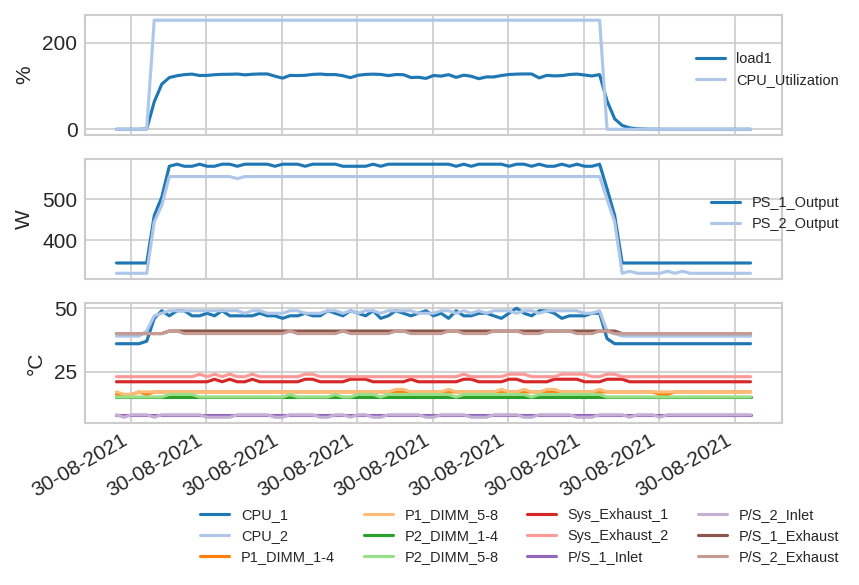

<Figure size 960x900 with 0 Axes>

In [31]:
new_date = pd.to_datetime(data['date'], unit = 's')  # epoch to matplotlib.timestamp
new_date.head()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=False)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20c.colors)

ax1.plot_date(new_date, data['load1'], label='load1', linestyle='solid', marker=None)
ax1.plot_date(new_date, data['CPU_Utilization'], label='CPU_Utilization',  linestyle='solid', marker=None)
ax2.plot_date(new_date, data['PS_1_Output'], label='PS_1_Output',  linestyle='solid', marker=None)
ax2.plot_date(new_date, data['PS_2_Output'], label='PS_2_Output',  linestyle='solid', marker=None)
ax3.plot_date(new_date, data['CPU_1'], label='CPU_1', linestyle='solid', marker=None)
ax3.plot_date(new_date, data['CPU_2'], label='CPU_2', linestyle='solid', marker=None)
ax3.plot_date(new_date, data['P1_DIMM_1-4'], label='P1_DIMM_1-4', linestyle='solid', marker=None)
ax3.plot_date(new_date, data['P1_DIMM_5-8'], label='P1_DIMM_5-8', linestyle='solid', marker=None)
ax3.plot_date(new_date, data['P2_DIMM_1-4'], label='P2_DIMM_1-4', linestyle='solid', marker=None)
ax3.plot_date(new_date, data['P2_DIMM_5-8'], label='P2_DIMM_5-8', linestyle='solid', marker=None)
ax3.plot_date(new_date, data['Sys_Exhaust_1'], label='Sys_Exhaust_1', linestyle='solid', marker=None)
ax3.plot_date(new_date, data['Sys_Exhaust_2'], label='Sys_Exhaust_2', linestyle='solid', marker=None)
ax3.plot_date(new_date, data['P/S_1_Inlet'], label='P/S_1_Inlet', linestyle='solid', marker=None)
ax3.plot_date(new_date, data['P/S_2_Inlet'], label='P/S_2_Inlet', linestyle='solid', marker=None)
ax3.plot_date(new_date, data['P/S_1_Exhaust'], label='P/S_1_Exhaust', linestyle='solid', marker=None)
ax3.plot_date(new_date, data['P/S_2_Exhaust'], label='P/S_2_Exhaust', linestyle='solid', marker=None)


plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)

ax1.set_ylabel('%')
ax2.set_ylabel('W')
ax3.set_ylabel('°C')

ax1.legend(loc='upper right', fontsize='x-small', bbox_to_anchor = (1.10, 0.8))
ax2.legend(loc='upper right', fontsize='x-small', bbox_to_anchor = (1.10, 0.8))
ax3.legend(loc='upper right', fontsize='x-small', ncol=4, bbox_to_anchor = (1.10, -0.6))

mpl.rcParams['figure.dpi'] = 150
plt.figure(figsize=(6.4,6.0))
plt.tight_layout()
